## **Motivation**
From this case study, the dataset used (BMW used cars dataset) provides a potential solution for an accurate and fast way to evaluate the market value of a used vehicle given serveral easily collectible information, such as model of the car and mileage. On the used car market, how to evaluate the market value of a car objectively and accurately has always been a challenge for inexperienced used car sellers. If applicable, this case study will give both car sellers and buyers with limited information and experience an advantage when bargaining as well as a much easier way to plan financially when it comes to buying and selling cars. 

## **Data source description**
Here is a dataset for BMW used cars. It includes the market price for sale, the year when the used car was bought, the series that the used car belongs to, the mileage that how many miles the used car has run, the tax that needs to be paid, and the engine size of the used car. The dataset has relatively high quality: other than some duplicates, there are few missing values in the dataset. However, these duplicates are easily identifiable so the data cleaning required is minimal.

## **Problem statement**
Based on the information that collected so far, the task is to find an objective and accurate evaluation of a used car when it enters the market. Some insights into the main factors that determine the value of a used car are also valuable. Moreover, the major focus is to find a suitable model to predict the market value of a used car depending on its easily accesible descriptions, vis-à-vis the six provided features. From the modeling prospective, the target variable is the "price" of a used bmw car, and the features used are the six provided features.

## **Analysis Plan**
First, exploratory analysis on the dataset is conducted in order to 1)evluate the quality of the data, and 2) find out the necessary transformation and feature engineering needed in order to achieve optimal modeling results. Multiple visualization methods, including boxplot, barplot, density plot, ridge plot etc.

After necessary transformation and feature engineering have been performed, multiple modeling techniques are compared to find the optimal model. In order to make sure an appropriate hyperparameter setting is chosen for each model, cross-validation with hyperparameter tuning is applied for each model. To evaluate the result of each model, considering 1) this is a regression problem and 2) the analysis is under the assumption that for each customer, the utility margin for equal amount of money is also equal, Root-mean Squared Error has been decided as the single performance metric in this case study.

After the optimal model has been selected, the model is retrained on a broader dataset for better generalization and for a fair evalution of the prediction accuracy. Feature importance has also been plotted for a sanity check and to provide insights for future modeling purposes. 
At last, opportunities for future improvements and broader application are given for stakeholders to evalute the business value of this model.

## **Executive Summary**
Overall, the BMW used cars dataset has provided a fast way to predict the market value of a used car with estimated error below $2266 within seconds.The targeted customer who will be interested in this functionality will be non-professional used car sellers and used car buyers. With more engineering resources available, this model can be used in more complex use cases, including guiding buyers to find their ideal used car, helping used car sells set more competitative price and eventually help this app users to make better financial decisions when it comes to the buying and selling of used cars.

In [67]:
!pip install joypy

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import joypy

In [69]:
from google.colab import drive
import re

In [70]:

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.compose import ColumnTransformer
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import ShuffleSplit

# **Load Data**


**Data Processing**


*   Download data from Github and upload it into Google Drive. 
*   Programmatically load data into the analytical tool - Google colab here.
Perform cleaning tasks on text values, removing all whitespace from every data frame cell.  

*   Perform cleaning tasks on missing values. After cleaning, there is no missing value. 

*   Check whether duplicate rows exist. And drop duplicate rows.









In [71]:
drive.mount('/content/drive')
df_bmw=pd.read_csv('/content/drive/MyDrive/Datacamp DS certification/bmw.txt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
print('Number of records: {} \nNumber of features: {}'.format(len(df_bmw), len(df_bmw.columns)))
print('Features: {}'.format(df_bmw.columns))

Number of records: 10781 
Number of features: 9
Features: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [73]:
# check whether exists duplicate rows 
duplicateRows_df=df_bmw[df_bmw.duplicated(keep=False)]
duplicateRows_df


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
173,X4,2019,33998,Semi-Auto,7272,Diesel,150,42.8,2.0
174,X4,2019,33998,Semi-Auto,7272,Diesel,150,42.8,2.0
379,X1,2018,16995,Semi-Auto,17276,Petrol,150,46.3,1.5
393,X1,2018,16995,Semi-Auto,17276,Petrol,150,46.3,1.5
643,1 Series,2019,21898,Manual,4100,Petrol,150,41.5,1.5
...,...,...,...,...,...,...,...,...,...
9797,4 Series,2019,25449,Automatic,6890,Diesel,145,65.7,2.0
9939,M3,2009,16950,Manual,65000,Petrol,580,21.9,4.0
9940,M3,2009,16950,Manual,65000,Petrol,580,21.9,4.0
9942,3 Series,2013,10985,Automatic,70000,Diesel,165,50.4,2.0


In [74]:
# drop duplicate rows and keep 
df_bmw = df_bmw.drop_duplicates(keep='first').reset_index(drop=True)

# remove all whitespace from text data
df_bmw['model']=df_bmw['model'].apply(lambda x: x.strip())
df_bmw.model.unique()

array(['5 Series', '6 Series', '1 Series', '7 Series', '2 Series',
       '4 Series', 'X3', '3 Series', 'X5', 'X4', 'i3', 'X1', 'M4', 'X2',
       'X6', '8 Series', 'Z4', 'X7', 'M5', 'i8', 'M2', 'M3', 'M6', 'Z3'],
      dtype=object)

# **Exploratory Analysis**


The exploratory analysis contains the following steps:

1. profile the dataset, calculate basic stats (min,max,std...) of each features to obtain a high level understanding of the dataset

2. visualize the target variable distribution to see if any need transformation is needed

3. visualize the relationship between features and target variable to get intution for feature engineer and modeling


In [75]:
# summary statistics of all columns
df_bmw.describe()

,year,price,mileage,tax,mpg,engineSize
count,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000
mean,2017.062828,22692.888691,25710.978995,131.597431,56.483121,2.170161
std,2.350668,11434.921030,25146.634940,61.611394,31.465604,0.552556
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14897.000000,5665.750000,135.000000,45.600000,2.000000
50%,2017.000000,20261.500000,18783.000000,145.000000,53.300000,2.000000
75%,2019.000000,27890.000000,38436.500000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


**Variable - Price**: boxplot 

To visualize the distribution of the target variable, boxplots are used in order to observe its central value, spread of distribution and outliers. The central value is observed to be around 20,000 and it only has a few outliers above 80,000, indicating the distribution of the target variable to be approximately normal. Therefore no transformation to the target variable is necessary.

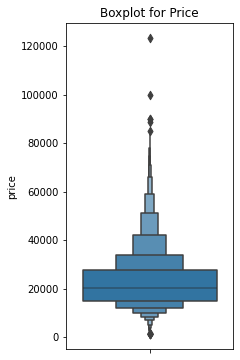

In [76]:
df_bmw_vis=df_bmw.copy()
# boxplot for price that indicates the distribution of price
plt.figure(figsize=(3,6))
sns.boxenplot(y='price',data=df_bmw_vis,showfliers=True).set_title('Boxplot for Price')
plt.show()



**Variable - Model** summary table, car model plot, ridgeline plot for TOP 10 popular BMW used cars

Through statistics summary table, the total number of BMW used cars and average price per model can be calculated. The reason ridge plot is used here is that it helps compare the distribution of various models' price. According to the plot, there is an ordinal relationship between both the model category (e.g. X series in X3) and model id (e.g. 5 in model M5). Based on this observation,the model column is divided into two columns, one is the model category(str: Series, X, M, i or Z) and the other is the model id (1,2,3 ... 8). These 2 features are manually created as categorical variables because there might exist an implicit relationship between model categories and model ids that determine the market value of an used car. For example, model category = i implies BMW's eletric vehicle series, which is likely to drive up the market value. Additionally, since both variables are one-hot-encoded, splitting model category and id can reduce the dimensionality of the dataset.


In [77]:
# summary table for all models, their number of cars, and average price for each model
model_table=df_bmw_vis.groupby('model')['price'].agg(['count','mean']).sort_values(['count'],ascending=False).reset_index()
model_table

,model,count,mean
0,3 Series,2434,19851.691044
1,1 Series,1962,15810.910805
2,2 Series,1188,19445.345118
3,5 Series,1051,22496.283539
4,4 Series,986,22441.975659
5,X1,797,19835.963614
6,X3,550,27742.525455
7,X5,464,39559.471983
8,X2,261,28526.808429
9,X4,177,32630.740113


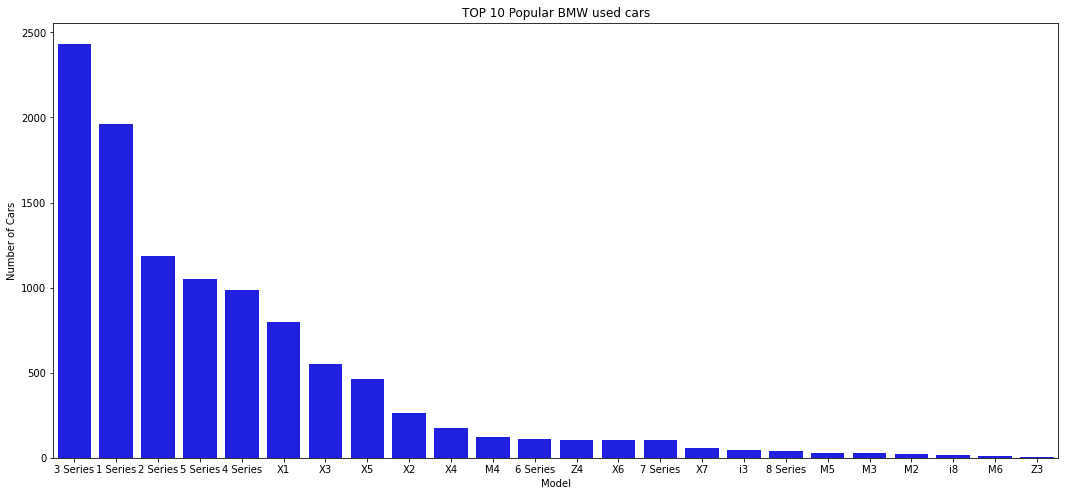

In [78]:
# model type plot based on number of cars
plt.figure(figsize=(18,8))
sns.countplot(data=df_bmw_vis,x='model',order=df_bmw_vis['model'].value_counts().index, color='blue')
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.title('TOP 10 Popular BMW used cars')
plt.show()

In [79]:
# get the top 10 popular models by number of cars 
model_list=model_table.model.unique()[:10]
model_list

array(['3 Series', '1 Series', '2 Series', '5 Series', '4 Series', 'X1',
       'X3', 'X5', 'X2', 'X4'], dtype=object)

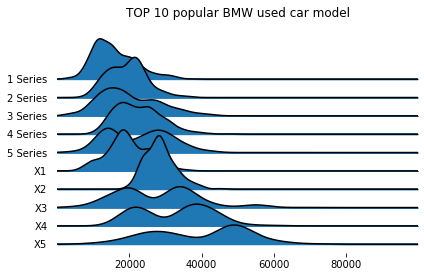

In [80]:
# ridgeline plot for TOP 10 popular used car models
df_bmw_vis_subset=df_bmw_vis.loc[df_bmw_vis['model'].isin(model_list)]
fig,ax=joypy.joyplot(data=df_bmw_vis_subset,by='model',column=['price'],alpha=1,
                     title='TOP 10 popular BMW used car model',x_range=[0,100000])



Density plot is used to show and compare the distrbutions of different transmissions' prices. Compared to ridgeplot, density plot can better reflect the overlapping area between different transmission types. As observed from this plot, there is a high degree of overlap between 3 types of transmission.

Text(4.386601562499997, 0.5, 'Density')

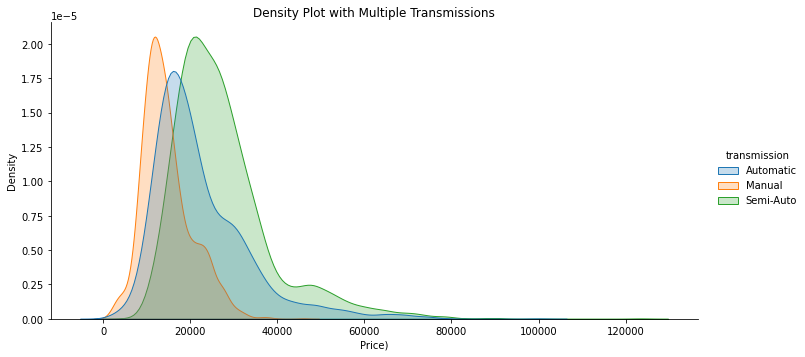

In [81]:
sns.displot(df_bmw_vis,x='price',hue='transmission',kind='kde',aspect=2,height=5,fill=True)

# Plot formatting
plt.title('Density Plot with Multiple Transmissions')
plt.xlabel('Price)')
plt.ylabel('Density')



**Variable Fueltype**: ridgeline plot

Since the distributions of prices among fuel type tend to be not as similar as those of transmission, ridgeline plots are used to visualize them. As can be observed from the ridgeline plot, the widthes of the peak for each fuel type vary, for example, electric-fueled vehicles have much smaller variance in price when compared with that of hybrid. It can also be observed that omitting other variables, hybrid and petro-fueled vehicles have similar distribution of market price.

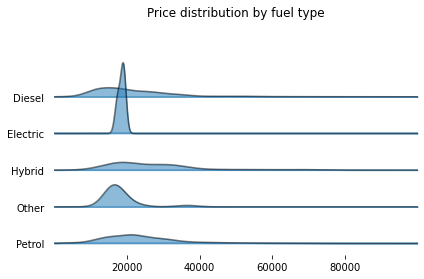

In [82]:
fig,ax=joypy.joyplot(data=df_bmw_vis,by='fuelType',column=['price'],alpha=0.5,
                     title='Price distribution by fuel type',x_range=[0,100000])




**Variable - Year**: summary table, ridgeline plot for BMW used cars price between 2010 and 2020

Summary table is used to show the relationship between the year of a used car and the average price of it. It also shows the sample size for each year in the count column.

In addition to the summary table, ridgeline plots are used to visualize the distribution of price in relation to the car year. It is be observed that cars from an earlier year usually have a cheaper market price. Furthermore, cars from an earlier year also show a smaller variance of their price distribution.In other words, older cars tend to have a more fixed range of price despite other conditions while newer cars has more uncertainty in price which can be caused by car accidents, change in market taste and etc.

In [83]:
year_table=df_bmw_vis.groupby('year')['price'].agg(['sum','count','mean']).sort_values(['count'],ascending=False).reset_index()
year_table

,year,sum,count,mean
0,2019,105657839,3396,31112.437868
1,2016,31230984,1877,16638.776771
2,2017,33106909,1718,19270.610594
3,2015,14005683,921,15207.039088
4,2018,19230380,846,22730.945626
5,2020,25559032,722,35400.321330
6,2014,6640704,498,13334.746988
7,2013,3949278,355,11124.726761
8,2012,1134509,119,9533.689076
9,2011,464054,51,9099.098039


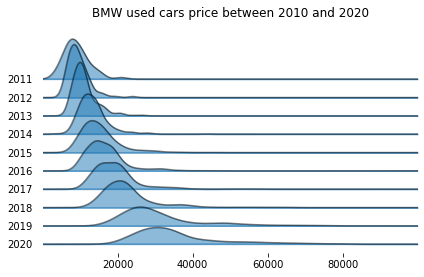

In [84]:
# distribution of price for ten years 
ten_year_list=year_table.year.unique()[:10]
df_bmw_vis_year=df_bmw_vis.loc[df_bmw_vis['year'].isin(ten_year_list)].copy()
fig,ax=joypy.joyplot(data=df_bmw_vis_year,by='year',column=['price'],alpha=0.5,
                    title='BMW used cars price between 2010 and 2020',
                     x_range=[0,100000])


**Variable - Tax**:
It was observed that tax variable has less variance, so it is unlikely that it will be a powerful predictor.

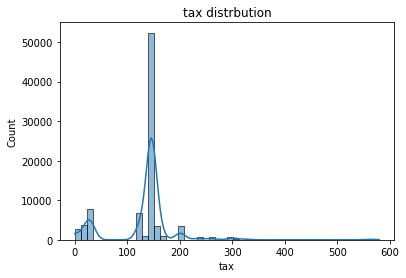

In [85]:
sns.histplot(data=df_bmw_vis,x='tax',bins=50,kde=True,weights=8).set_title('tax distrbution')

plt.show()

Here the 2 additional feature based on model type are generated as described above:

In [86]:
df_bmw['model_category'] = df_bmw['model'].apply(lambda x: ''.join(re.findall("[a-zA-Z]+",x)))
df_bmw['model_id'] = df_bmw['model'].apply(lambda x: int(''.join(re.findall(r'\d+',x))))
df_bmw['car_age'] = 2021 - df_bmw['year']

# **Model**

This section contains the following steps:

1. define features and target variable clearly

2. perform train-test split on the whole dataset

3. perform appropiate scaling and encoding on features

4. grid search the model using 5-fold cross validation
* For each model with specific model hyperparameter set, 4 among 5 cross validation set is used to fit and the one left is used to validate and measure using RMSE as the accuracy metric since it is assumed that the utility for each customer of equal amount of money is the same. Then the 5 RMSE values are averaged to be compared with other models in order to select for the optimal.

5. visualize each model's average RMSE and select the best model with the best accuracy performance

6. refit using the complete training set and evaluate using the untouched test set

7. plot the feature importance for the best model to obtain better understanding of the model 

In [87]:
feature_cols = ['car_age','transmission','mileage','tax','mpg','engineSize','fuelType','model_category','model_id']
target_col = ['price']

In [88]:
X = df_bmw[feature_cols]
y = df_bmw[target_col]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
input_data = [X_train, X_test, y_train, y_test]

**Scikitlearn's column transformer & pipeline to provide a clear view of the work flow inside the models.**

**The function `pipeline_model` does**

1) transforms input features

2) cross validation on the training set to tune hyperparameters

3) valid model on testing set using `rmse`



***Discussion about preprocessing step:***

*Since it was observed the numerical features have a distribution that is closed to  normal distribution, standard scaler was applied to scale all numerical features.*

*One-hot encoding is used to transform categorical variable. The first encoded category is removed to avoid co-linearity* 

In [90]:
def pipeline_model(model,input_data_list,parameter_grid):
    """
    model: a scikitlearn regressor
    input_data_list: [X_train, X_test, y_train, y_test]
    parameter_grid: do we need to use cross validation to tune hyperparameters
    """
    X_train, X_test, y_train, y_test = input_data_list
    column_transform = ColumnTransformer(
      [("standardscaler",StandardScaler(), [0,2,3,4,5]),
       ("onehotencoder",OneHotEncoder(drop='first'), [1,6,7,8]),
       ])
    pipe = Pipeline(steps = [('preprocessor', column_transform),
                               ('model',model)],
                                verbose=True) # tranforms input features
  
    cv = GridSearchCV(pipe, parameter_grid, n_jobs=-1,refit=True,scoring='neg_mean_squared_error', cv = ShuffleSplit(n_splits=5,random_state=12))
    # NOTE: the refit = True, which means the best estimator will re_train on entire training set
    
    cv.fit(X_train,y_train)# crossvalidate on training set -> select best estimators -> retrain on training set

    pred = cv.predict(X_test)# predict on testing set to report model RMSE score
    rmse = mean_squared_error(y_test,pred,squared=False)

    print(f'rmse is {rmse} \n using model {model}')
    return cv,(-cv.best_score_)**0.5,rmse 


## Train and Test 4 different Models

### Statistical Model: Linear Regression

Linear regression analysis is performed for: 1) it can be used as a fast baseline model for comparison with more complex models 2) its analysis results can be easily interpreted as multiple hypothesis testing

To obtain a statistical result on Linear Regression, `statsmodels` is used instead of scikit-learn. Therefore, scikit-learn pipeline cannot be used and a seperate column_transformer is built here.



In [91]:
column_transform = ColumnTransformer(
    [ ("standardscaler",StandardScaler(), [0,2,3,4,5]),
      ("onehotencoder",OneHotEncoder(drop='first',sparse=False), [1,6,7,8]), 
     # Apply one_hot encoding to deal with categorical variable, standarize the numerical variable (not necessary in linear regression)
    ])

X_train_reg = column_transform.fit_transform(X_train)

In [92]:
one_hot_categories = column_transform.transformers_[1][1].categories_ 
print(one_hot_categories)# print it from OneHotEncoder Category Attributes
# Manually organize these columns
one_hot_cols = ['transmission','fuelType','model_category','model_id']
one_hot_col_names = []
for ohc,ohc_ls in zip(one_hot_cols,one_hot_categories):
    one_hot_col_names.extend([ohc+'_'+str(x) for x in ohc_ls[1:]])  # here we drop the first category to avoid colinearity problem
entire_col_ls = feature_cols + one_hot_col_names
for col in ['transmission','fuelType','model_category','model_id']:
    entire_col_ls.remove(col)
# show all feature columns 
entire_col_ls

[array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object), array(['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'], dtype=object), array(['M', 'Series', 'X', 'Z', 'i'], dtype=object), array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)]


['car_age',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'transmission_Manual',
 'transmission_Semi-Auto',
 'fuelType_Electric',
 'fuelType_Hybrid',
 'fuelType_Other',
 'fuelType_Petrol',
 'model_category_Series',
 'model_category_X',
 'model_category_Z',
 'model_category_i',
 'model_id_2',
 'model_id_3',
 'model_id_4',
 'model_id_5',
 'model_id_6',
 'model_id_7',
 'model_id_8']

In [93]:
df_train_reg = pd.DataFrame(X_train_reg)
df_train_reg.columns = entire_col_ls# add the names to dataframe columns


Here it is hypothesized that all features can influence the price. Thus linear regression analysis can be used to evaluate the feature significance.

In [94]:
lr = sm.OLS(y_train.reset_index(drop=True), sm.add_constant(df_train_reg))
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1754.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:26:21   Log-Likelihood:                -79026.
No. Observations:                7998   AIC:                         1.581e+05
Df Residuals:                    7975   BIC:                         1.583e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.02

According to the regression analysis, all features has p-value smaller than 0.001 (except some one-hot encoded variable which have a high p-value but the original feature overall is still significant). Therefore, all varaibles are contributive to the prediction results. It was decided that no feature selection is necessary in the modeling procedure. 

### Machine Learning Model (Advanced Statistical Model)

After running linear regression analysis, more complex modeling techniques are used in order to select the model with the best prediction performance. 4 model types are used: LinearRegression, ElasticNet, RandomForestRegressor, and XGBRegressor. Grid searching for two major hyperparameters was used to make sure a proper complexity level was included.

####Linear Regression

In [95]:
# Add regression to pipeline without parameter tuning
lr_res,lr_cv_score,lr_test_score = pipeline_model(LinearRegression(),input_data,{})

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
rmse is 4468.07322039331 
 using model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#### Elastic Net

In [96]:
para_grid_en = {'model__alpha':[0,0.2,0.5,1,2],
                'model__l1_ratio':[0,0.2,0.5,0.8,1]}
# turn the alpha and l1 ration for elastic net 
en_res,en_cv_score,en_test_score = pipeline_model(ElasticNet(random_state=10),input_data,para_grid_en)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
rmse is 4468.270347497224 
 using model ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='cyclic', tol=0.0001, warm_start=False)


#### Random Forest

In [97]:
para_grid_rf = {'model__n_estimators':[10,50,100,200],
                'model__max_depth':[2,5,10,20]}
# turn the number of estimators and max depth in Random Forest 

rf_res,rf_cv_score,rf_test_score = pipeline_model(RandomForestRegressor(random_state=10),input_data,para_grid_rf)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[Pipeline] ............. (step 2 of 2) Processing model, total=   5.2s
rmse is 2406.007375484733 
 using model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)


#### Xgboost

In [98]:
para_grid_xgb = {'model__max_depth':[4,8,16],
                 'model__eta':[0.05,0.1,0.3]
                 }
# turn the number of estimators and max depth in Xgboost 

xgb_res,xgb_cv_score,xgb_test_score = pipeline_model(XGBRegressor(objective='reg:squarederror',random_state=10),input_data,para_grid_xgb)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.6s
rmse is 2266.029786026894 
 using model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


#### **Model Evaluation**:


In [99]:
score_result_dict = {
 'model_name':['linear_regression','linear_regression','elastic_net','elastic_net','random_forest','random_forest','xgboost','xgboost'],
 'score_type':['cv_error','test_error','cv_error','test_error','cv_error','test_error','cv_error','test_error'],
 'RMSE': [lr_cv_score,lr_test_score,en_cv_score,en_test_score,rf_cv_score,rf_test_score,xgb_cv_score,xgb_test_score]
 }
df_score = pd.DataFrame(score_result_dict)
df_score

,model_name,score_type,RMSE
0,linear_regression,cv_error,4725.748290
1,linear_regression,test_error,4468.073220
2,elastic_net,cv_error,4725.609764
3,elastic_net,test_error,4468.270347
4,random_forest,cv_error,2634.901655
5,random_forest,test_error,2406.007375
6,xgboost,cv_error,2519.891690
7,xgboost,test_error,2266.029786


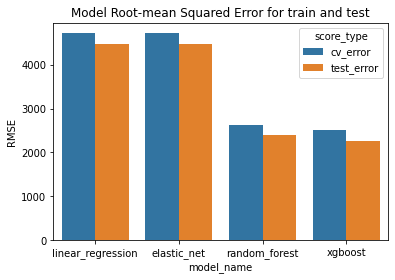

In [100]:
sns.barplot(x="model_name", hue="score_type", y="RMSE", data=df_score)
plt.title('Model Root-mean Squared Error for train and test')
plt.show()

**Summarize the Model Score:**

The bar chart above shows the RMSE across 4 different models (with best hyperparameters) in 5 fold cross-validation setting (taking the mean cross-validated score of the best_estimator) and their RMSE in the testing setting.  According to this chart, xgboost model shows the best performance with the smallest RMSE value in cross-validation set and test set. Meanwhile, the RMSE calcuated in test set is consistent with the RMSE calculated in the cross-validation set across all models. It is also observed in the chart that tree based model overall have better perfermance then linear models. One interesting observation is the RMSE in cross-validation set is slightly higher than the that in the testing set. A possibie explanation is that a model is only trained using 80% of training data in cross-validation while the model have already retrained using 100% training data in testing. Additional 20% of samples might improve the model performance. Therefore, the model in the test set can have lower RMSE than the model in cross-validation. In summary, according to the RMSE in cross-validation set, xgboost is selected as the best model to use in this case.



### Select Xgboost Model as our Final Model

Plot Feature Importance

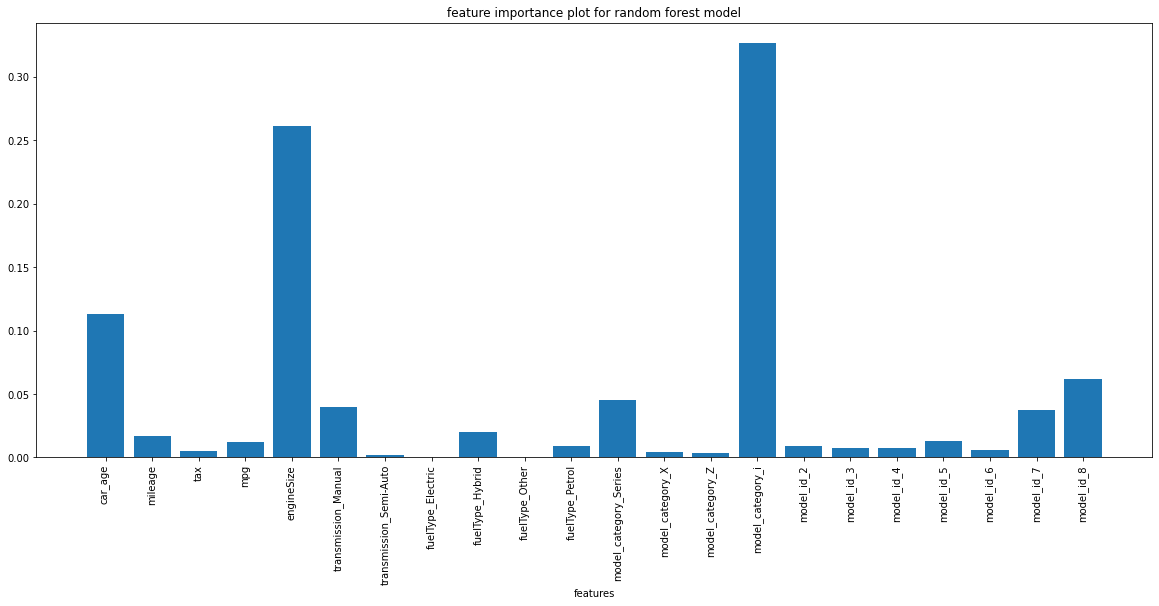

In [101]:
plt.figure(figsize=(20,8))
plt.bar(entire_col_ls,xgb_res.best_estimator_.named_steps.model.feature_importances_)
plt.title('feature importance plot for random forest model')
plt.xlabel('features')
plt.xticks(rotation = 90) 
plt.show()



In the feature importance plot, car_age, enginesize and model category have high influence on price. Model_category_i has the highest feature importance. In the data for Model i, there are only two models i3 and i8. Meanwhile, there are huge price differences between these two types. i3 usually range between 10k - 25k while i8 ranges between 50k - 70k. If the model type is fixed either for i3 or i8, the price has a relative small variance.

In [102]:
# Check the i models in the data
df_bmw[df_bmw['model_category']=='i'].head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_category,model_id,car_age
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6,i,3,5
411,i8,2016,48998,Automatic,10087,Hybrid,0,134.5,1.5,i,8,5
619,i3,2017,19998,Automatic,41949,Hybrid,140,470.8,0.0,i,3,4
775,i3,2017,19998,Automatic,41146,Hybrid,0,470.8,0.0,i,3,4
777,i3,2017,21898,Automatic,10839,Hybrid,0,470.8,0.0,i,3,4
872,i8,2019,67500,Automatic,6000,Hybrid,140,141.2,1.5,i,8,2
889,i8,2017,48898,Automatic,36127,Hybrid,0,134.5,1.5,i,8,4
1219,i8,2018,57870,Automatic,11278,Hybrid,135,134.5,1.5,i,8,3
1571,i8,2019,74226,Automatic,10,Hybrid,135,141.2,1.5,i,8,2
1802,i3,2017,19980,Automatic,26965,Hybrid,140,470.8,0.0,i,3,4


# **Application**

Using the model results, calculate_my_used_car_price moduel is developed. This application is designed to help estimate a used bmw car price based on features including 'car_age', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize','fuelType', 'model'. It can be used for both car seller and buyer to estimate the car price. It would ask user to input these features and use the trained model to predict a price based on the input features.

In [103]:
class calculate_my_used_car_price:
    """
    This class uses the trained model to predict the car price with input features
    It generates hint for user to input their car feature
    It is also able to show a list of same category bmw with similar car age to 
    give the user more information in addtion to predicted price
  
    """
    def __init__(self,dmw_dataset,model):
        """
        dmw_dataset: pd.dataframe, this is the original dataframe df_dmw
        model: sklearn.pipeline, it can be rf_res, xgb_res, en_res from the above process
        """
        self.df = dmw_dataset
        self.model = model
        self.pred_input_dict = {k:np.nan for k in ['car_age', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize',
           'fuelType', 'model_category', 'model_id']}
        self.car_price = None

    def prompt_for_input(self,feature_name):
        """
        provide prompt based on feature name, 
        verify the user input
        ask user to re-enter if the input value is not valid
        store the input value into a dict
        feature_name: str
        """
        prompt =  self.get_input_prompt(feature_name)
        if len(prompt) == 2:
            obj_prompt, obj_set =  prompt
            obj_input = input(f'please enter {feature_name} information of your car,'+obj_prompt+':  ')
            while obj_input not in obj_set:
                print('the value you entered is not valid, please retry')
                obj_input = input(f'please enter {feature_name} information of your car,'+obj_prompt+':  ')
            self.pred_input_dict[feature_name] = obj_input
        else:
            num_input = float(input(f'please enter {feature_name} information of your car,'+prompt+':  '))
            while num_input <= 0:
                print('the value you entered is not valid, please retry')
                num_input = float(input(f'please enter {feature_name} information of your car,'+prompt+':  '))
            self.pred_input_dict[feature_name] = num_input
    
    def ask_for_input(self):
        """
        iterate prompt for input for all features
        """
        for k in self.pred_input_dict.keys():
            self.prompt_for_input(k)


 
    def get_input_prompt(self,feature_name):
        """
        get prompt str and validation criteria based on the current feature_name
        feature_name: str
        """
        if self.df[feature_name].dtype == object:
            return f'please enter a value from the following {self.df[feature_name].unique()}',self.df[feature_name].unique()
        else:
            min_range = self.df[feature_name].min()
            max_range = self.df[feature_name].max()
        return  f'a common value to enter is between {min_range} and {max_range}'

    def calculate_price(self):
        """
        use the trained model pipeline to estimate the price
        """
        self.ask_for_input()
        pred_df = pd.DataFrame(self.pred_input_dict,index=[0])
        self.car_price = self.model.predict(pred_df)[0]
        print(f'your car price is {self.car_price}')


    def show_similar_car(self):
        """
        In addition to showing user the car price, 
        we want to provide a list of similar used cars with price to our user 
        to make our prediction more convincing 
        similar cars are queried based on 
        1. the same model type
        2. the closest car age

        """
        if self.car_price is None:
            print('please calculate the price first')
        else:
            df_same_model = df_bmw[(df_bmw['model_id']==self.pred_input_dict['model_id']
                                  )&(df_bmw['model_category']==self.pred_input_dict['model_category']
                                    )].reset_index(drop=True)
            return df_same_model.iloc[(df_same_model['car_age']-self.pred_input_dict['car_age']).abs().values.argsort()[:10]]


In [104]:
mycar = calculate_my_used_car_price(df_bmw,xgb_res)

In [106]:
mycar.calculate_price()

please enter car_age information of your car,a common value to enter is between 1 and 25:  4
please enter transmission information of your car,please enter a value from the following ['Automatic' 'Manual' 'Semi-Auto']:  Automatic
please enter mileage information of your car,a common value to enter is between 1 and 214000:  20000
please enter tax information of your car,a common value to enter is between 0 and 580:  100
please enter mpg information of your car,a common value to enter is between 5.5 and 470.8:  67
please enter engineSize information of your car,a common value to enter is between 0.0 and 6.6:  3
please enter fuelType information of your car,please enter a value from the following ['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']:  Diesel
please enter model_category information of your car,please enter a value from the following ['Series' 'X' 'i' 'M' 'Z']:  X
please enter model_id information of your car,a common value to enter is between 1 and 8:  5
your car price is 27896.

In addition to the predicted price, the application also allows seller to see a list of price of the cars which are under simiar conditions. For example, if a seller has a bwm x5 of year 2016, using the function show_similar_car(), the seller would find a list of bwm x5 of year 2016 with their prices (queried from our database). In this way, a seller is more informed about his/her car price

In [107]:
mycar.show_similar_car()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_category,model_id,car_age
90,X5,2017,50990,Automatic,10,Diesel,145,47.1,3.0,X,5,4
35,X5,2017,36898,Automatic,28193,Petrol,150,29.1,4.4,X,5,4
428,X5,2017,32000,Automatic,29183,Diesel,150,47.1,3.0,X,5,4
427,X5,2017,38000,Automatic,9038,Petrol,150,29.1,4.4,X,5,4
38,X5,2017,30990,Automatic,31536,Diesel,200,47.1,3.0,X,5,4
39,X5,2017,32498,Automatic,22306,Diesel,145,47.1,3.0,X,5,4
419,X5,2017,31499,Automatic,23646,Diesel,145,47.1,3.0,X,5,4
85,X5,2017,33991,Automatic,32771,Diesel,145,47.1,3.0,X,5,4
131,X5,2017,35470,Automatic,47717,Diesel,235,42.8,3.0,X,5,4
214,X5,2017,31950,Automatic,27932,Diesel,145,47.1,3.0,X,5,4


Direction for improvements: 

1. RMSE is used as the accuracy matrix as it tells on average how much error we made on our price prediction. In addition to this, the application can also have a confidence score for each prediction, which can be calculated based on the distance between car features and sample car features. In other words, how many car prices with similar car features that exists in the current database can be an indicator of the confidence in our prediction.

2. When a user want to calcuate their used bmw price, it is not necessary for one to enter all the features. Additional models can be trained which only takes in a subset of features and makes price predictions. In this case, user does not have to have all the information for the price calculation.

3. The business problem here is to predict the used car market value given certain features. But it is also possible that we use the price and other features to predict the year of the car or the model of the car. All of these problems can be solved using the same modeling approach.

4. If more time is given, an application can be implemented mainly based on the optimal model fitted for used BMW vehicle buyers: when a buyers specify his/her price range and some fixed feature, the App can provide him/her with a relationship between other features and the market price within the price range. For example, when a customer specify his budget to be between 25K to 30K and specify a vehicle with automatic transmission and 3 Series, the App can give him how mileage and year influence market price to assist him in better making a decision.

## **Conclusion & Recommendation**
To conclude this case study, the xgboost model provides a fast and relatively accurate way for customers to evalute the market value of a used BMW car. The error range is below $2266, and the current model only supports predictions given all variables. Target customers for this use case include both used car sellers and buyers.

To take better usage of this model, it is recommended that the stakeholders evaluate the use cases in further details, including how many customers are interested in this functionality, and their needs for other relevant use cases. Given the current model, it does not require extensive data science effort to fit for other use cases. For example, the adding and reducing of features of this model can be easily reproduced using the same strategy used here. In the direction for improvements section, more future directions for improvement are given.